## FEC Campaign Finance: 

### Contributions from committees to candidates & independent expenditures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from copy import deepcopy
from matplotlib import font_manager as fm, rcParams
from matplotlib.lines import Line2D
from matplotlib.offsetbox import (
    AnnotationBbox,
    OffsetImage, 
)

%matplotlib inline

In [2]:
year = '2018'

In [3]:
gave = pd.read_csv('data/04a_committee_stats.csv')
mask = [True if ('comm1__' in x) else False for x in gave['name']]
gave1 = gave[mask]
gave1.index = list(gave1['name'].values)

cand = pd.read_csv('data/04a_cand_cleaned.csv')
cands = list(set(cand['cand_id']))
cols = [x for x in list(gave1.columns) if x in cands]
cols.extend(['total', 'count', 'distinct', 'entity_tps'])
gave1 = gave1[['name'] + cols]
print(len(gave1))
gave1.head(2)

1274


,name,H0AL02087,H0AL05163,H0AL07086,H0AR01083,H0AR03055,H0AZ01259,H0CA03078,H0CA10073,H0CA10149,...,S8VT00141,S8WA00194,S8WA00319,S8WI00224,S8WV00143,S8WY00189,total,count,distinct,entity_tps
comm1__WATERFRONT STRATEGIES (against),comm1__WATERFRONT STRATEGIES (against),0,0,0,0,0,0,0,0,0,...,0,0,0,0,8003952,0,215198771,627,77,['enttp_Organization (not a committee and not ...
comm1__NEBO MEDIA (against),comm1__NEBO MEDIA (against),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,106207121,432,48,['enttp_Organization (not a committee and not ...


In [4]:
for col in gave1.columns:
    if gave1[col].sum() == 0:
        gave1.drop([col], axis = 1, inplace = True)
        print(col)

H2FL20043
H2HI02128
H2MA09072
H2MI17023
H2OH17109
H2TX01062
H2VI00082
H4AS00036
H4MN08091
H4WA07073
H6CA03067
H6CA44145
H6FL23063
H6IA02161
H6IL11133
H6IL18161
H6KY05111
H6OH11160
H6TN08250
H6TX15204
H6TX24149
H8AL01066
H8AL04094
H8AL05190
H8AL06099
H8AR01029
H8AR04130
H8AZ03159
H8CA09144
H8CA12270
H8CA13096
H8CA15117
H8CA16065
H8CA26114
H8CA35115
H8CA36170
H8CA41170
H8CA44117
H8CA47078
H8CA51062
H8CA52102
H8CA53084
H8CO01162
H8CO02251
H8CO07094
H8CT04214
H8FL04085
H8FL05157
H8FL08102
H8GA02087
H8GA03051
H8GA10197
H8GA11062
H8GA14025
H8GU01020
H8GU01046
H8HI00012
H8ID01215
H8ID02148
H8IL10115
H8IL15072
H8IN06152
H8KY02080
H8KY03211
H8KY04169
H8LA01122
H8LA01130
H8LA03037
H8LA04282
H8MA02116
H8MA03106
H8MA03114
H8MA06133
H8MA09046
H8MD02118
H8ME01203
H8MI10108
H8MO03198
H8MO07223
H8MP00041
H8MS01145
H8MS03125
H8NC01104
H8NC10097
H8NE03095
H8NJ02232
H8NJ07256
H8NJ08080
H8NM01448
H8NY03151
H8NY09174
H8NY10099
H8NY18274
H8NY27150
H8OH08097
H8OK01173
H8OK02148
H8PA05295
H8PA07192
H8PA13133


In [5]:
counts = gave1.drop([
    'name', 
    'total', 
    'count', 
    'distinct', 
    'entity_tps',

], axis = 1)

for col in counts.columns:
    counts[col] = [1 if x > 0 else 0 for x in counts[col]]
    
print(len(counts.columns))
counts = counts.sum().sort_values(ascending = False)
counts[:20]

693


S8AZ00197    226
H8AZ08083    152
H8CA45130    129
S8NV00156    127
H8CA48035    111
H8CA39174    107
S6MO00305    103
H8PA18181    102
S6MT00162     97
H8OH12297     96
S6PA00217     92
H8CA25074     92
H8VA07094     87
H8FL26039     86
H8PA04090     85
S6OH00163     85
S8FL00166     81
S2WI00219     81
H8WA08189     78
H2NV04011     76
dtype: int64

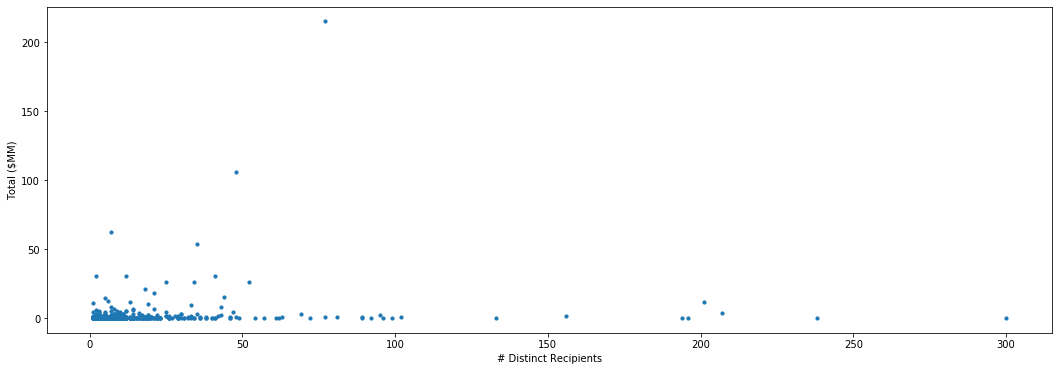

In [6]:
plt.figure(figsize = (18, 6))

plt.scatter(
    gave1['distinct'], 
    gave1['total']/1.0E6, 
    s = 10,
)
plt.xlabel('# Distinct Recipients')
plt.ylabel('Total ($MM)')
plt.show();

In [21]:
std_tot = gave1['total'].std()
med_tot = gave1['total'].median()

std_dist = gave1['distinct'].std()
med_dist = gave1['distinct'].median()

gave1_new = gave1[
    ~(
        (gave1['total'] < 1.*med_tot + 0.*std_tot) & \
        (gave1['distinct'] < 1.*med_dist + 0.*std_dist)
    ) \
    & (gave1['distinct'] > 10)
]

len(gave1_new)

224

In [22]:
gave1_new['distinct'].value_counts().sort_index()

11     31
12     16
13     11
14     15
15      4
16      9
17     11
18     11
19     13
20      6
21      5
22      9
23      4
25      4
26      5
27      1
28      1
29      5
30      3
31      2
32      2
33      3
34      3
35      2
36      3
38      3
40      2
41      3
42      1
43      2
44      1
46      3
47      1
48      2
49      1
52      1
54      1
57      1
61      1
62      1
63      1
69      1
72      1
77      2
81      1
89      2
92      1
95      1
96      1
99      1
102     1
133     1
156     1
194     1
196     1
201     1
207     1
238     1
300     1
Name: distinct, dtype: int64

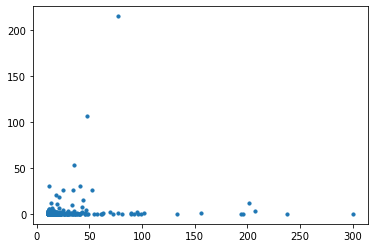

In [23]:
plt.figure()

plt.scatter(
    gave1_new['distinct'], 
    gave1_new['total']/1.0E6, 
    s = 10,
)
plt.show();

In [24]:
rows = []
for comm in list(gave1_new.index):
    lil_row = []
    lil_cand = cand[cand[comm] > 0]
    for which in ['Republican', 'Democrat', 'Third party']:    
        liller_cand = lil_cand[lil_cand['cand_pty_affiliation'] == which]
        lil_row.append(liller_cand[comm].sum())
        lil_row.append(len(liller_cand.drop_duplicates(['cand_id'], keep = 'first')))
    rows.append(lil_row)
    
rows = pd.DataFrame(
    rows, 
    columns = [
        'r_amt', 
        'r_count', 
        'd_amt', 
        'd_count',
        't_amt',
        't_count',
    ], 
    index = list(gave1_new['name'].values), 
)

rows.sort_index(inplace = True)
rows.head()

,r_amt,r_count,d_amt,d_count,t_amt,t_count
comm1__76 WORDS CORP (for),0.0,0,492202.0,38,0.0,0
comm1__ACTIVE ENGAGEMENT (for),44286.0,16,0.0,0,0.0,0
comm1__ADELAROCHE DESIGNS (for),6870.0,22,0.0,0,0.0,0
comm1__AFL-CIO (umbrella) (for),0.0,0,53667.0,20,0.0,0
comm1__ALLEGIANCE DIRECT (for),1074217.0,42,0.0,0,0.0,0


In [25]:
rows[(rows['r_amt'] != 0) & (rows['d_amt'] != 0)].sort_index()

,r_amt,r_count,d_amt,d_count,t_amt,t_count
comm1__AMERICAN AIRLINES (for),2500.0,1,17194.0,11,0.0,0
comm1__AMERICAN EXPRESS (against),17669.0,16,3340.0,1,0.0,0
comm1__AMERICAN MARKETING AND PUBLISHING (for),45771.0,19,9568.0,1,0.0,0
comm1__BUDGET (umbrella) (for),2500.0,1,13037.0,14,0.0,0
comm1__CHI/DONAHUE (against),6576.0,12,548.0,1,0.0,0
comm1__CLUB FOR GROWTH (against),21779.0,9,37728.0,13,0.0,0
comm1__CLUB FOR GROWTH (for),60777.0,28,178.0,1,0.0,0
comm1__CONNECTION STRATEGY (for),2440129.0,90,22254.0,5,0.0,0
comm1__CREATIVE DIRECT (against),8865.0,2,1057057.0,23,0.0,0
comm1__DEMOCRACY LIVE (for),338.0,5,12905.0,187,136.0,2


In [28]:
rows['cm'] = [x.replace('comm1__', '').replace(' (for)', '').replace(' (against)', '') for x in list(rows.index)]

these = list(rows['cm'].value_counts()[rows['cm'].value_counts() > 1].index)

these

['FP1 STRATEGIES',
 'MAJORITY STRATEGIES',
 'STONES PHONES',
 'BULLY PULPIT INTERACTIVE',
 'AMERICAN MARKETING AND PUBLISHING',
 'I360',
 'CONNECTION STRATEGY',
 'HEADWAY WORKFORCE SOLUTIONS',
 'ANNE LEWIS STRATEGIES',
 'WATERFRONT STRATEGIES',
 'GOOGLE',
 'CREATIVE DIRECT',
 'THE PIVOT GROUP',
 'FEDERAL CAPITOL COMMUNICATIONS CORP',
 'PARAMOUNT COMMUNICATIONS',
 'THE HERALD GROUP',
 'MASTER PRINT',
 'REVOLUTION MESSAGING',
 'UNITED STATES POSTAL SERVICE',
 'PLANNED PARENTHOOD (umbrella)',
 'NEBO MEDIA',
 'BLUEPRINT INTERACTIVE',
 'CLUB FOR GROWTH',
 'FOR OUR FUTURE ACTION FUND',
 'DELIVER STRATEGIES',
 'SKDKNICKERBOCKER',
 'TARGETED VICTORY',
 'FACEBOOK',
 'IMGE',
 'MENTZER MEDIA SERVICES',
 'PROLIST',
 'KILLER TRACKS',
 'RST MARKETING']

In [54]:
def plot_foragainst(this):
    # 'this' (committee) both advocated and opposed
    this_cm = cand.loc[
        (cand[f'comm1__{this} (against)'] >= 0) & \
        (cand[f'comm1__{this} (for)'] >= 0), [
            'cand_id',
            'cand_name',
            'contest',
            'cand_pty_affiliation',
            'cand_ici',
            f'comm1__{this} (for)',
            f'comm1__{this} (against)',
    ]].sort_values(['cand_pty_affiliation', f'comm1__{this} (for)'], ascending = [True, False])
    
    mask = [False if ((this_cm.loc[i, f'comm1__{this} (for)'] == 0) & \
                      (this_cm.loc[i, f'comm1__{this} (against)'] == 0)) else True for i in list(this_cm.index)]
    
    this_cm = this_cm[mask]
    
    this_cm.loc[this_cm[f'comm1__{this} (against)'] == 0, f'comm1__{this} (against)'] = 1
    this_cm.loc[this_cm[f'comm1__{this} (for)'] == 0, f'comm1__{this} (for)'] = 1
    
    max_amt = max(this_cm[f'comm1__{this} (for)'].max(), this_cm[f'comm1__{this} (against)'].max())
    min_amt = min(this_cm[f'comm1__{this} (for)'].min(), this_cm[f'comm1__{this} (against)'].min())

    party_dict = {
            'Republican' : {
                'hex' : '#FF6661', 
                'mult' : 0,#0.3, 
                'party' : 'Republican',
            },
            'Democrat' : {
                'hex' : '#5494F7', 
                'mult' : 0,#-0.3, 
                'party' : 'Democrat',
            },
            'Third party' : {
                'hex' : '#15DCDC',
                'mult' : 0,
                'party' : 'Third party',
            }
        }

    ici_dict = {
        'I' : ['o', 'incumbent'],
        'C' : ['D', 'challenger'],
        'O' : ['+', 'open'],
    }

    vol_light = '#f8fbfc'
    vol_dark = '#263C4D'

    fig = plt.figure(figsize = (8, 8))

    # face/axis colors
    fig.patch.set_facecolor(vol_light)
    ax = fig.add_subplot(111)
    ax.patch.set_facecolor(vol_light)

    vol_dark_rcparams = [
        'patch.edgecolor',
        'grid.color',
        'text.color',
        'axes.labelcolor',
        'xtick.color',
        'ytick.color',
        'axes.edgecolor'
    ]

    for which in vol_dark_rcparams:
        plt.rcParams[which] = vol_dark

    font_dirs = ['../../css/fonts/for_matplotlib/', ]
    font_files = fm.findSystemFonts(fontpaths=font_dirs)
    font_list = fm.createFontList(font_files)
    fm.fontManager.ttflist.extend(font_list)

    plt.rcParams['font.family'] = 'DM Sans Medium'
    
    parties = list(set(this_cm['cand_pty_affiliation']))
    all_icis = list(set(this_cm['cand_ici']))
    
    for pty in parties:
        lil_this_cm = this_cm[this_cm['cand_pty_affiliation'] == pty]
        icis = list(set(lil_this_cm['cand_ici']))
        for ici in icis:
            liller_this_cm = lil_this_cm[lil_this_cm['cand_ici'] == ici]
            alpha = 0.75
            lw = 1.5
            s = 100
            if ici in ['I', 'C']:
                plt.scatter(
                    np.log10(liller_this_cm[f'comm1__{this} (for)']),
                    np.log10(liller_this_cm[f'comm1__{this} (against)']),
                    color = party_dict[pty]['hex'],
                    s = s,
                    lw = lw,
                    alpha = alpha,
                    facecolors = 'none',
                    marker = ici_dict[ici][0],
                )
            else:
                plt.scatter(
                    np.log10(liller_this_cm[f'comm1__{this} (for)']),
                    np.log10(liller_this_cm[f'comm1__{this} (against)']),
                    color = party_dict[pty]['hex'],
                    s = s,
                    lw = lw,
                    alpha = alpha,
                    marker = ici_dict[ici][0],
                )

    plt.title(f'{year} U.S. Congressional Elections:\n{this}\nIndependent Expenditures', fontsize = 18)
    plt.xlabel('\n'.join([r'Log$_{10}$(Total contribution', 'advocating candidate (USD))']), fontsize = 14)
    plt.ylabel('\n'.join([r'Log$_{10}$(Total contribution', 'opposing candidate (USD))']), fontsize = 14)
    plt.plot(
        [0, 1.2*np.log10(max_amt)], 
        [0, 1.2*np.log10(max_amt)], 
        ls = '--', 
        alpha = 0.3, 
        color = vol_dark,
    )
    
    legend_elements = []
    
    if 'Republican' in parties:
        legend_elements.append(
            mpatches.Patch(
                [0], 
                [0], 
                color=party_dict['Republican']['hex'], 
                label='Republican'
            )
        )
    if 'Democrat' in parties:
        legend_elements.append(
            mpatches.Patch(
                [0], 
                [0], 
                color=party_dict['Democrat']['hex'], 
                label='Democrat', 
            )
        )
    if 'Third party' in parties:
        legend_elements.append(
            mpatches.Patch(
                [0], 
                [0], 
                color=party_dict['Third party']['hex'], 
                label='Third party', 
            )
        )
    if 'I' in all_icis:
        legend_elements.append(
            Line2D(
                [0], 
                [0], 
                marker='o', 
                color=vol_light, 
                label='Incumbent', 
                markerfacecolor='#446d8c', 
                markersize=9,
            )
        )
    if 'C' in all_icis:
        legend_elements.append(
            Line2D(
                [0], 
                [0], 
                marker='D', 
                color=vol_light, 
                label='Challenger', 
                markerfacecolor='#446d8c', 
                markersize=9,
            )
        )
    if 'O' in all_icis:
        legend_elements.append(
            Line2D(
                [0], 
                [0], 
                marker='P', 
                color=vol_light, 
                label='Open seat', 
                markerfacecolor='#446d8c', 
                markersize=9,
            )
        )
    legend = plt.legend(
        loc='upper right', 
        fontsize=12, 
        facecolor='#f8fbfc', 
        handles=legend_elements,
    )
    
    x = ax.annotate('Source: FEC.gov', 
                    xy=(0.0, 0.0), 
                    xytext=(38.0, -28.0), 
                    ha='center', 
                    va='bottom', 
                    textcoords='axes pixels', 
                    xycoords='axes pixels',
                   )
    # logo
    arr_img = plt.imread('../../assets/VOL_Logo_Color_Light_Green.png')
    imagebox = OffsetImage(arr_img, zoom=0.07)
    imagebox.image.axes = ax
    xy = (0.0, -45.0)
    ab = AnnotationBbox(imagebox, 
                        xy,
                        xybox=(xy[0], xy[1]),
                        xycoords='axes pixels',
                        boxcoords=('axes pixels'),
                        box_alignment=(0., 0.),
                        frameon=False,
                       )
    ax.add_artist(ab)
    plt.show();
    return this_cm
#     except:
#         print('committee did not both advocate and oppose')
#         return

FP1 STRATEGIES


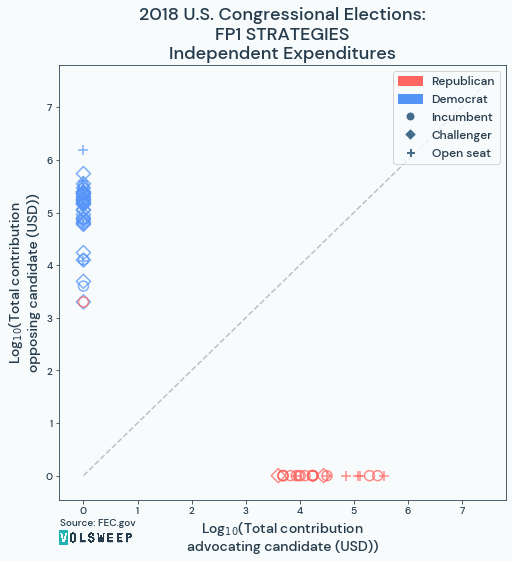

MAJORITY STRATEGIES


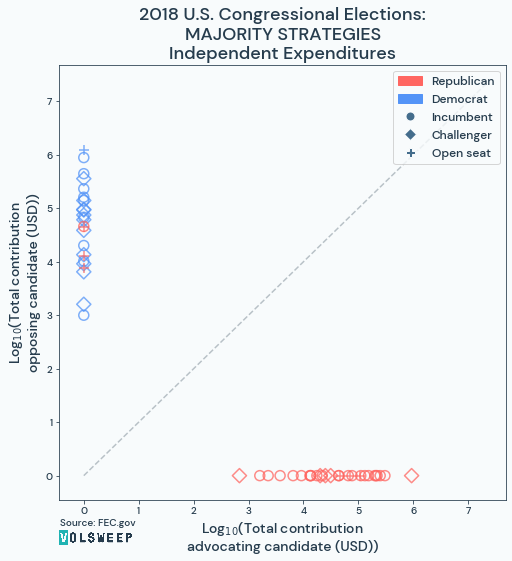

STONES PHONES


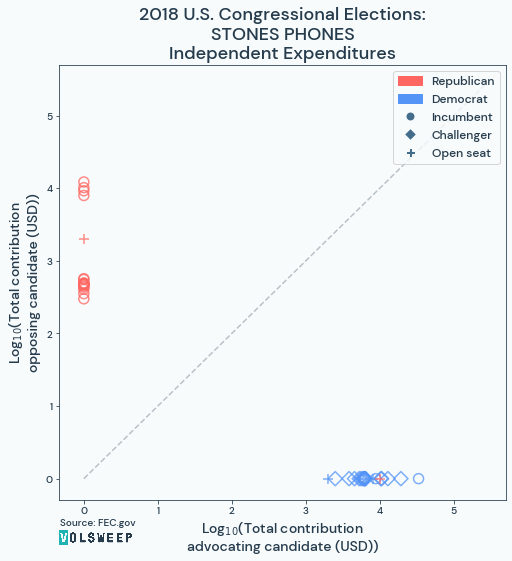

BULLY PULPIT INTERACTIVE


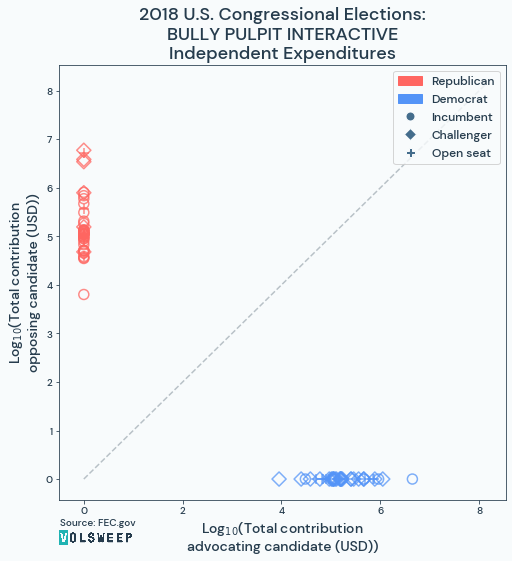

AMERICAN MARKETING AND PUBLISHING


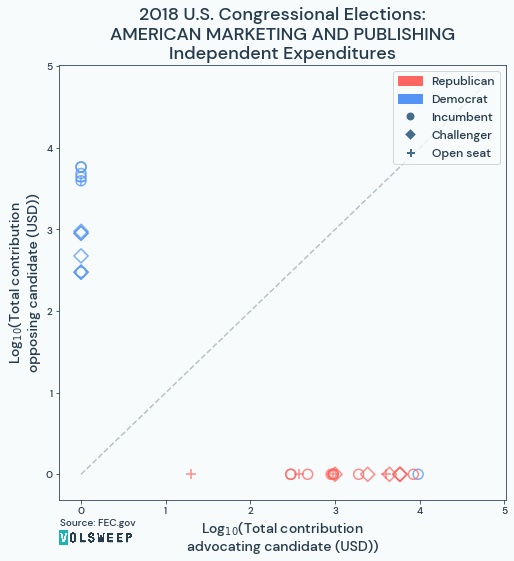

I360


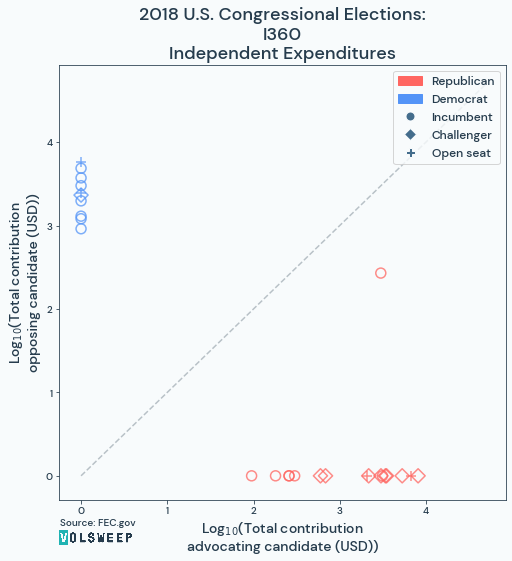

CONNECTION STRATEGY


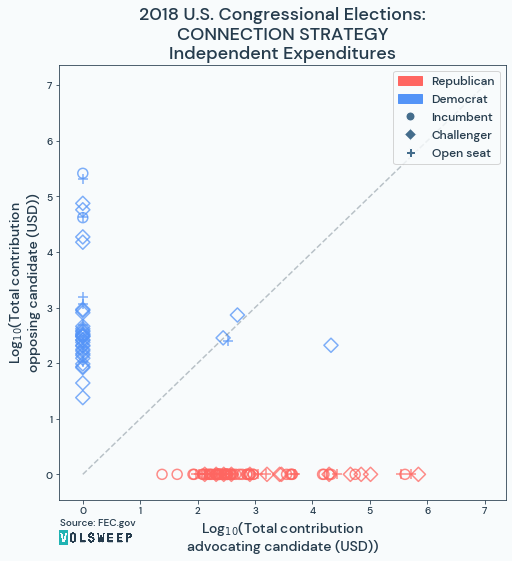

HEADWAY WORKFORCE SOLUTIONS


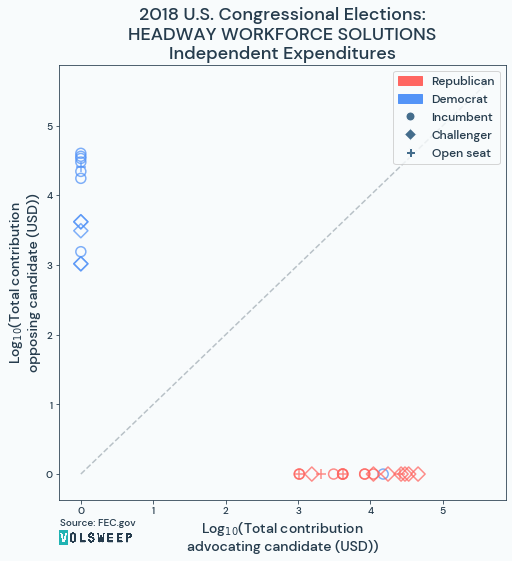

ANNE LEWIS STRATEGIES


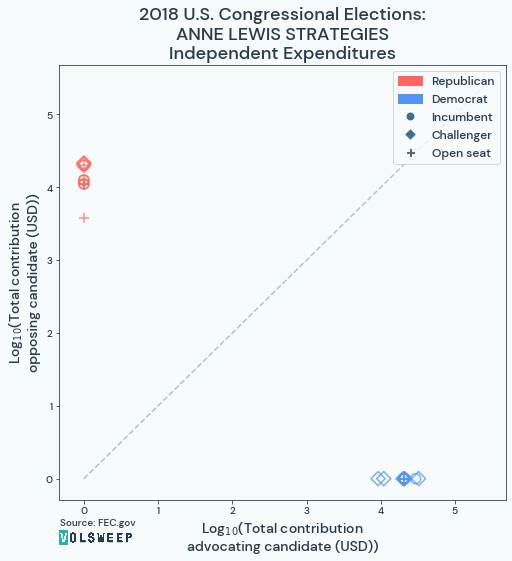

WATERFRONT STRATEGIES


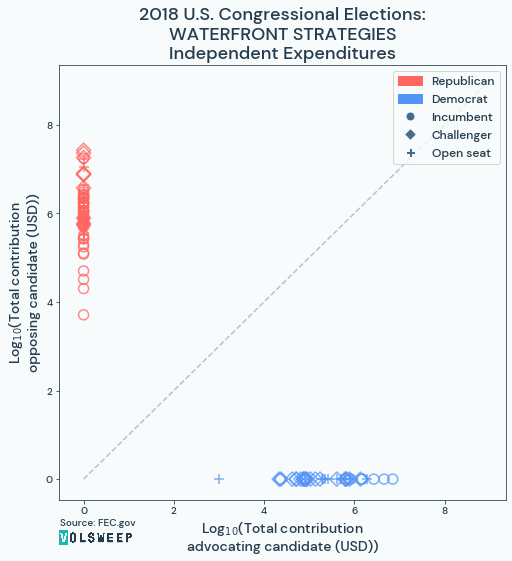

GOOGLE


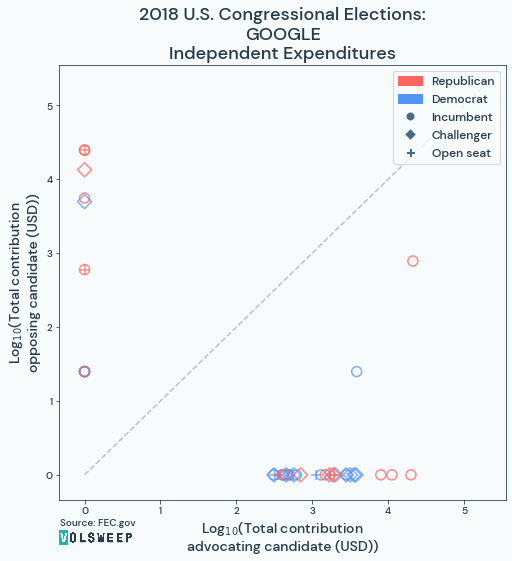

CREATIVE DIRECT


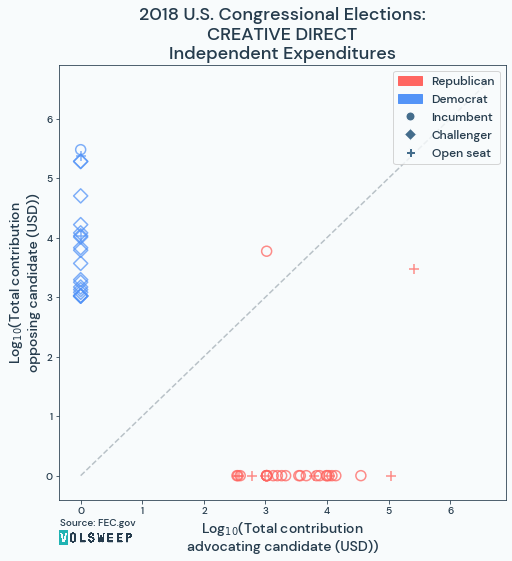

THE PIVOT GROUP


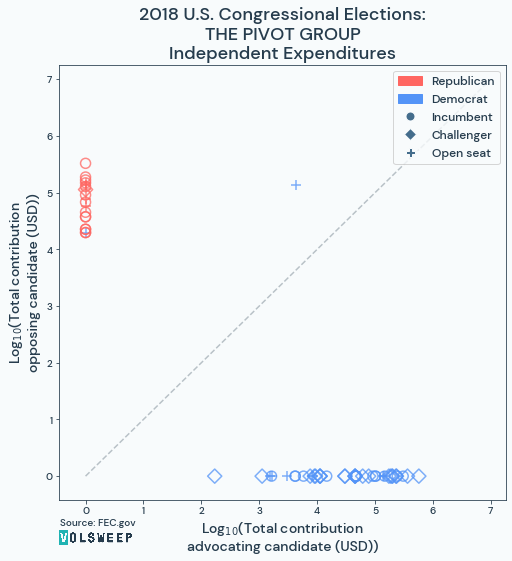

FEDERAL CAPITOL COMMUNICATIONS CORP


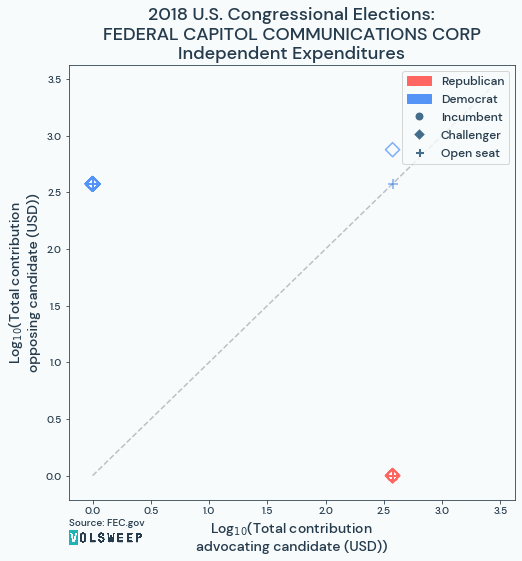

PARAMOUNT COMMUNICATIONS


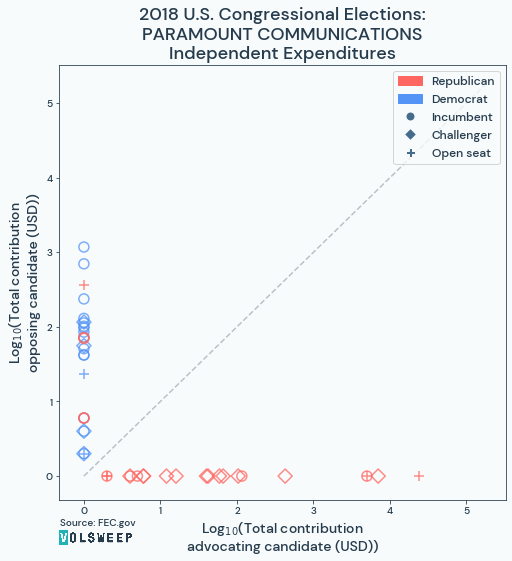

THE HERALD GROUP


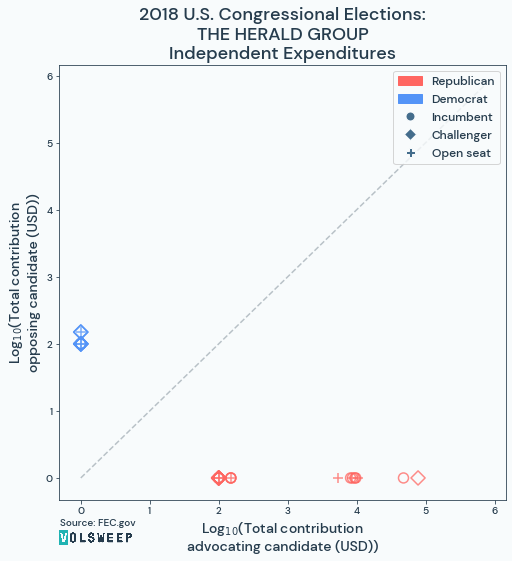

MASTER PRINT


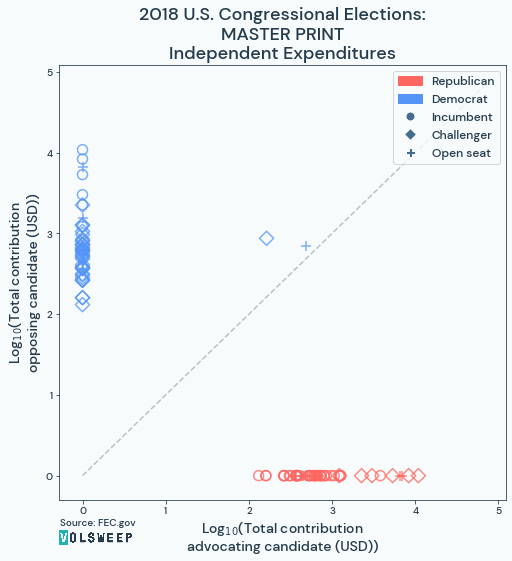

REVOLUTION MESSAGING


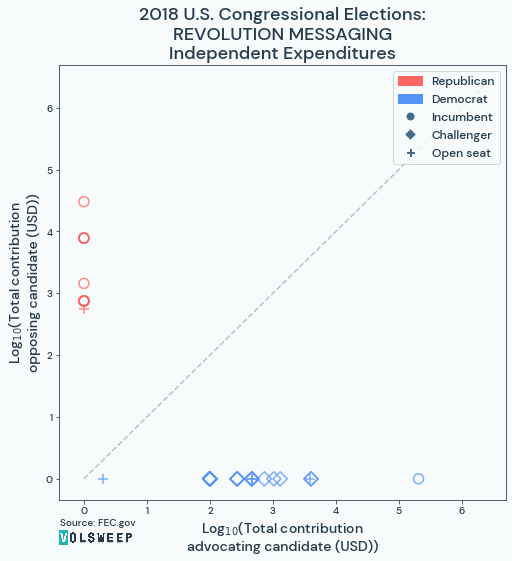

UNITED STATES POSTAL SERVICE


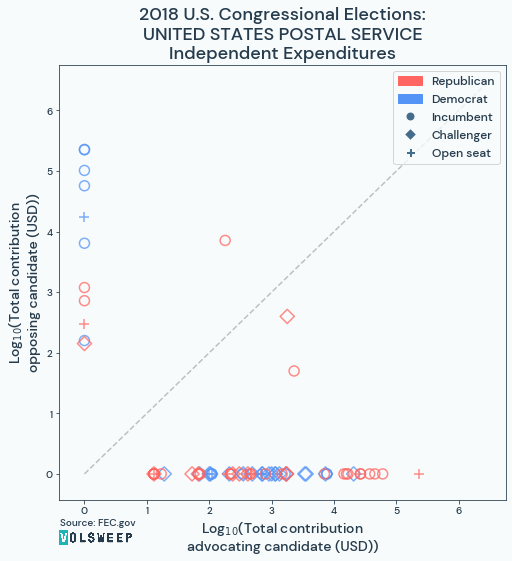

PLANNED PARENTHOOD (umbrella)


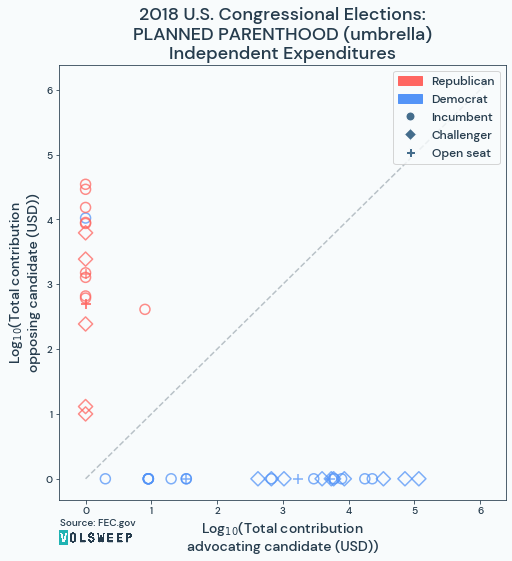

NEBO MEDIA


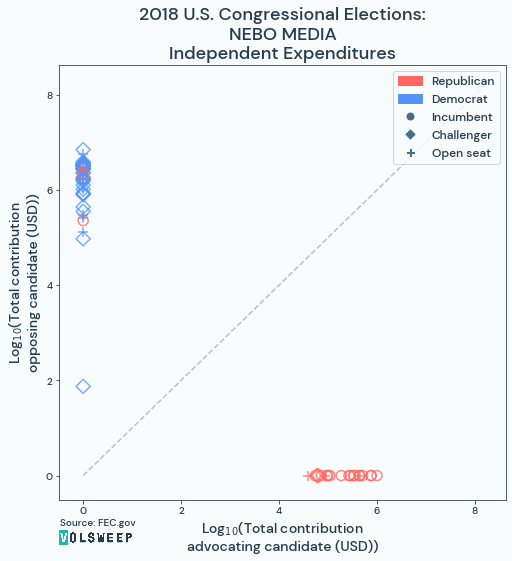

BLUEPRINT INTERACTIVE


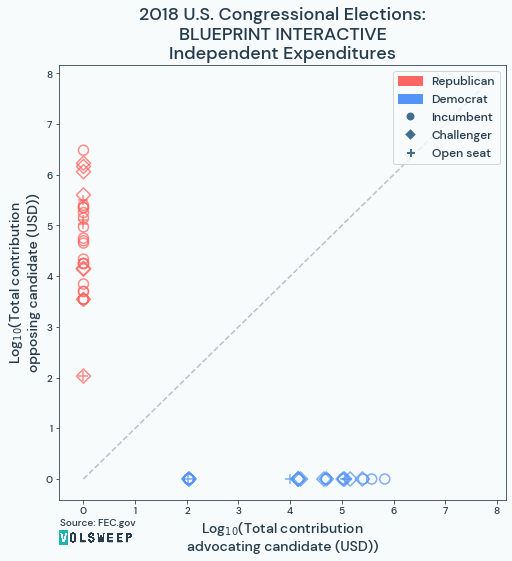

CLUB FOR GROWTH


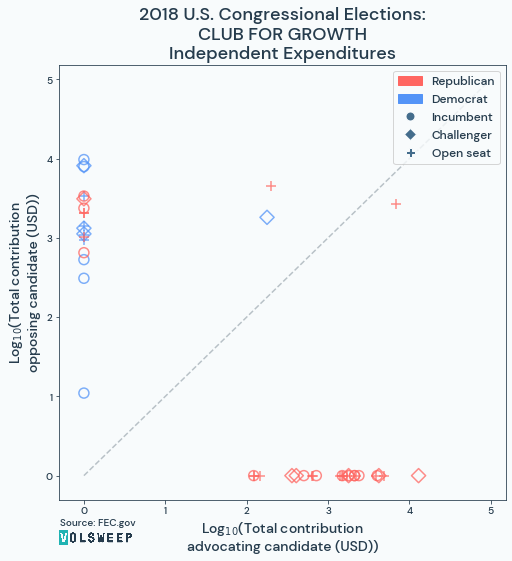

FOR OUR FUTURE ACTION FUND


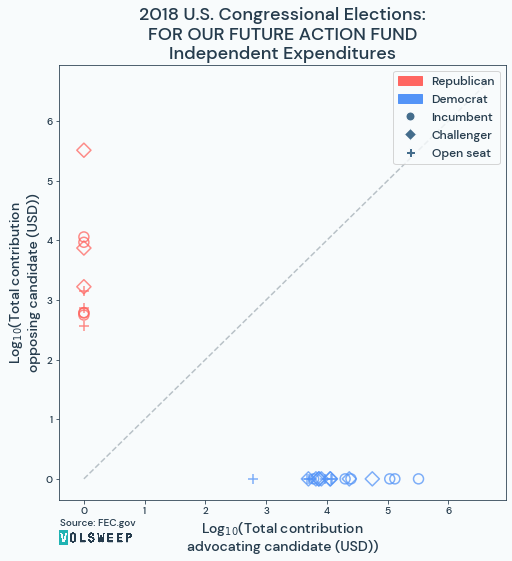

DELIVER STRATEGIES


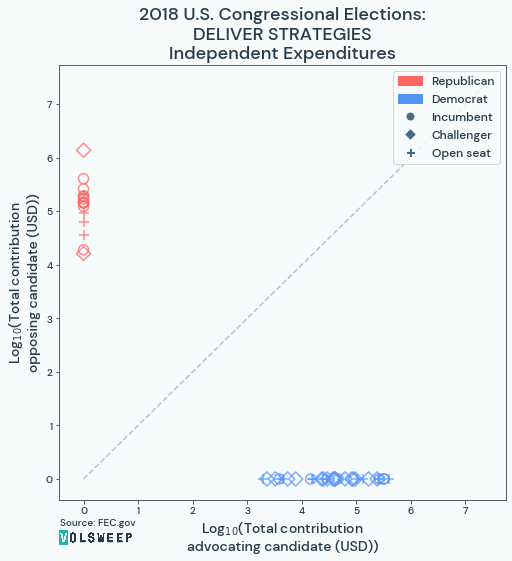

SKDKNICKERBOCKER


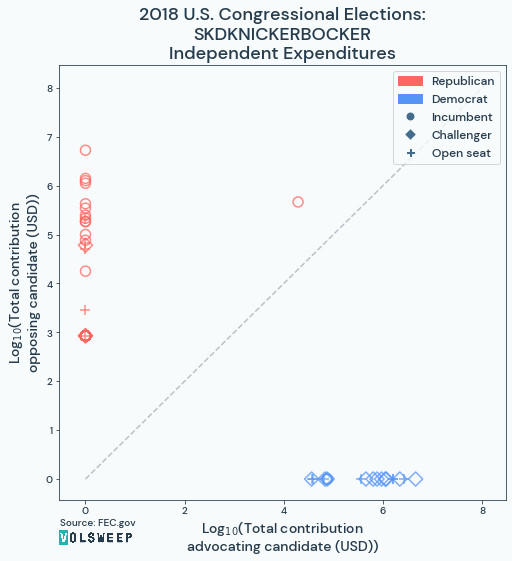

TARGETED VICTORY


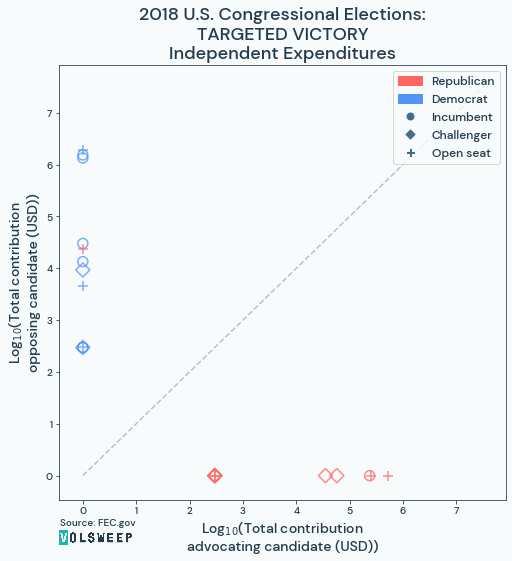

FACEBOOK


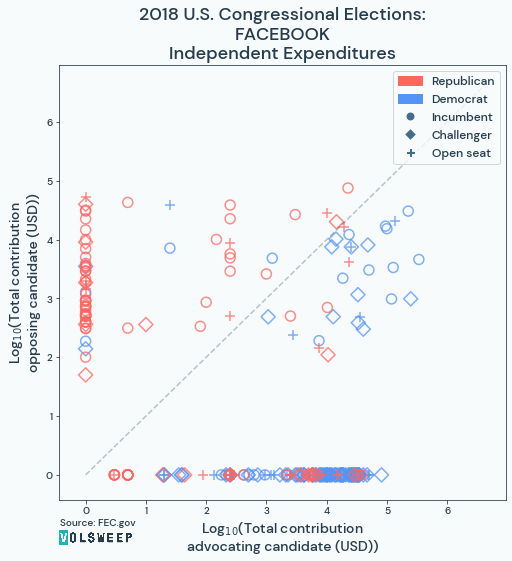

IMGE


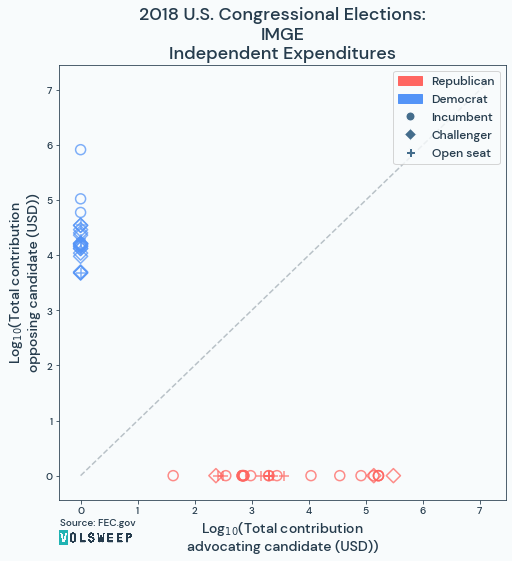

MENTZER MEDIA SERVICES


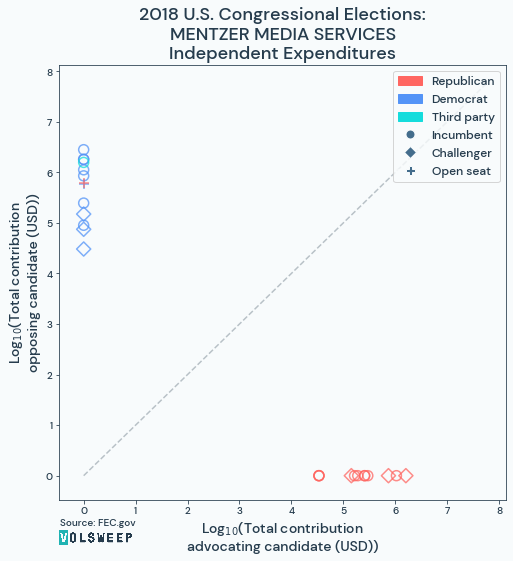

PROLIST


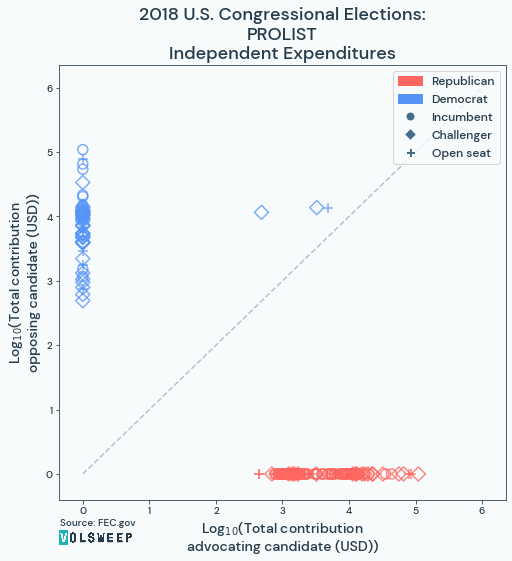

KILLER TRACKS


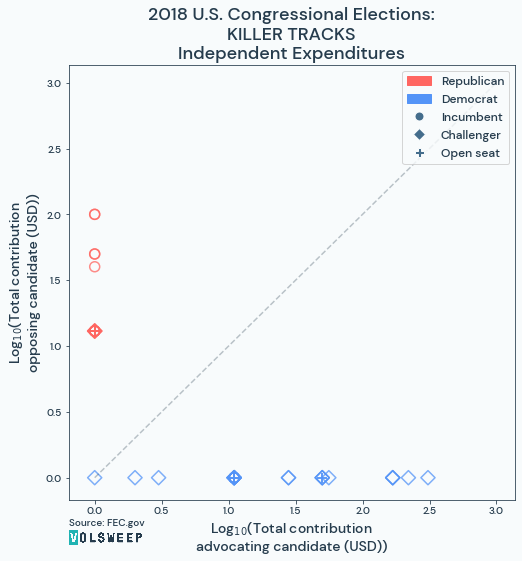

RST MARKETING


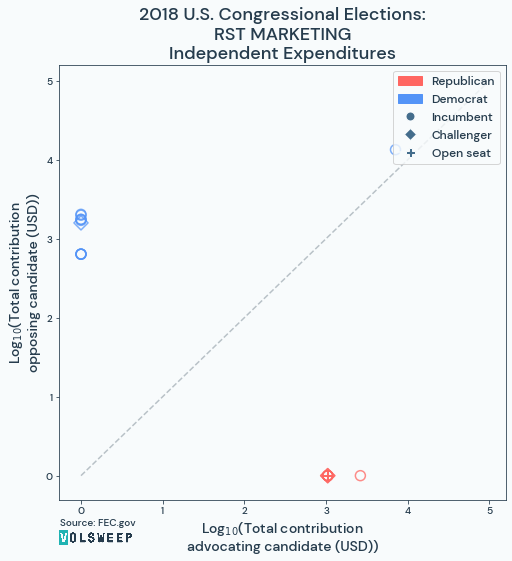

In [55]:
for thislet in these:
    print(thislet)
    plot_foragainst(thislet)

In [56]:
# HUSTLE advocated Republicans
cand.loc[
    (cand['comm1__HUSTLE (for)'] > 0) & \
    (cand['cand_pty_affiliation'] == 'Republican'), [
        'cand_id',
        'cand_name',
        'contest',
        'cand_pty_affiliation',
        'cand_ici',
        'comm1__HUSTLE (for)',
]].sort_values(['comm1__HUSTLE (for)'], ascending = False)

,cand_id,cand_name,contest,cand_pty_affiliation,cand_ici,comm1__HUSTLE (for)
9,H0CA19173,"DENHAM, JEFF",CA_10,Republican,I,3896.0
350,H6PA08277,"FITZPATRICK, BRIAN",PA_01,Republican,I,2864.0
191,H4FL26038,"CURBELO, CARLOS MR.",FL_26,Republican,I,1746.0
299,H6IL06117,"ROSKAM, PETER",IL_06,Republican,I,1152.0
506,H8ID01124,"FULCHER, RUSS",ID_01,Republican,O,1104.0
738,H8PA18199,"RESCHENTHALER, GUY MR.",PA_14,Republican,O,997.0
224,H4NJ03130,"MACARTHUR, THOMAS",NJ_03,Republican,I,518.0


In [57]:
# GOOGLE both advocated and opposed
cand.loc[
    (cand['comm1__GOOGLE (against)'] > 0) & \
    (cand['comm1__GOOGLE (for)'] > 0), [
        'cand_id',
        'cand_name',
        'contest',
        'cand_pty_affiliation',
        'cand_ici',
        'comm1__GOOGLE (for)',
        'comm1__GOOGLE (against)',
]].sort_values(['comm1__GOOGLE (for)'], ascending = False)

,cand_id,cand_name,contest,cand_pty_affiliation,cand_ici,comm1__GOOGLE (for),comm1__GOOGLE (against)
866,S2TX00312,"CRUZ, RAFAEL EDWARD TED",TX_senate,Republican,I,21167.0,785.0
874,S6MT00162,"TESTER, JON",MT_senate,Democrat,I,3848.0,25.0


In [49]:
# SKDKNICKERBOCKER advocated a Republican
cand.loc[
    (cand['comm1__SKDKNICKERBOCKER (for)'] > 0) & \
    (cand['cand_pty_affiliation'] == 'Republican'), [
        'cand_id',
        'cand_name',
        'contest',
        'cand_pty_affiliation',
        'cand_ici',
        'comm1__SKDKNICKERBOCKER (for)',
]].sort_values(['comm1__SKDKNICKERBOCKER (for)'], ascending = False)

,cand_id,cand_name,contest,cand_pty_affiliation,cand_ici,comm1__SKDKNICKERBOCKER (for)
26,H0IL14080,"HULTGREN, RANDY",IL_14,Republican,I,19392.0


In [50]:
# SKDKNICKEBOCKER opposed a Democrat
cand.loc[
    (cand['comm1__SKDKNICKERBOCKER (against)'] > 0) & \
    (cand['cand_pty_affiliation'] == 'Democrat'), [
        'cand_id',
        'cand_name',
        'contest',
        'cand_pty_affiliation',
        'cand_ici',
        'comm1__SKDKNICKERBOCKER (against)',
]].sort_values(['comm1__SKDKNICKERBOCKER (against)'], ascending = False)

,cand_id,cand_name,contest,cand_pty_affiliation,cand_ici,comm1__SKDKNICKERBOCKER (against)
94,H2GA02031,"BISHOP, SANFORD D",GA_02,Democrat,I,851.0
117,H2MN07014,"PETERSON, COLLIN CLARK",MN_07,Democrat,I,851.0
156,H2TX23082,"CUELLAR, HENRY R.",TX_28,Democrat,I,851.0
370,H6WI03099,"KIND, RONALD JAMES",WI_03,Democrat,I,851.0
713,H8OR05107,"SCHRADER, KURT",OR_05,Democrat,I,851.0


In [58]:
cand[cand['comm1__SKDKNICKERBOCKER (against)'] > 0]

,cand_id,cand_name,cand_ici,cand_pty_affiliation,ttl_receipts,trans_from_auth,ttl_disb,trans_to_auth,coh_bop,coh_cop,...,(for) count,(for) sum,(against) count,(against) sum,(coord pty exp) count,(coord pty exp) sum,(in-kind) count,(in-kind) sum,(nonaffiliated) count,(nonaffiliated) sum
0,H0AL02087,"ROBY, MARTHA",I,Republican,2573681.12,85734.19,2277448.83,0.00,45450.72,341683.01,...,3.0,353829.0,3.0,933.0,0.0,0.0,0.0,0.0,4.0,1644955.0
1,H0AL05163,"BROOKS, MO",I,Republican,1527246.16,0.00,2006001.97,0.00,1170937.70,692181.51,...,3.0,4703.0,2.0,861.0,0.0,0.0,0.0,0.0,3.0,250700.0
3,H0AR01083,"CRAWFORD, ERIC ALAN RICK",I,Republican,1019464.16,0.00,966616.64,0.00,258577.00,311424.52,...,0.0,0.0,2.0,861.0,0.0,0.0,0.0,0.0,5.0,464500.0
4,H0AR03055,"WOMACK, STEVE",I,Republican,1211826.66,0.00,1218424.03,0.00,1165816.16,1159218.79,...,0.0,0.0,2.0,861.0,0.0,0.0,1.0,135.0,4.0,631000.0
5,H0AZ01259,"GOSAR, PAUL DR.",I,Republican,588764.42,16108.36,575157.87,0.00,107593.03,121199.58,...,5.0,13088.0,2.0,861.0,0.0,0.0,1.0,200.0,3.0,202599.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,S8MS00196,"WICKER, ROGER F",I,Republican,6113589.06,586579.37,5881444.87,0.00,1620434.00,1852578.42,...,1.0,9004.0,3.0,918.0,0.0,0.0,2.0,1900.0,4.0,2241140.0
918,S8OH00102,"RENACCI, JAMES B.",C,Republican,12061786.51,1427954.48,12664106.42,12861.54,624545.32,22225.48,...,12.0,973748.0,35.0,37103.0,0.0,0.0,0.0,0.0,2.0,428656.0
920,S8PA00320,"BARLETTA, LOU",C,Republican,7407078.74,281757.79,7760181.65,88070.00,397460.61,44356.35,...,9.0,120000.0,7.0,1158460.0,1.0,4874.0,0.0,0.0,2.0,463128.0
922,S8TN00337,"BLACKBURN, MARSHA MRS.",O,Republican,14634619.97,2061568.42,16572477.70,20849.00,2551958.17,614100.03,...,62.0,8722145.0,9.0,16905939.0,1.0,1019962.0,3.0,2896.0,5.0,1524740.0


In [ ]:
# FP1 STRATEGIES opposed a Republican
cand.loc[
    (cand['comm1__FP1 STRATEGIES (against)'] > 0) & \
    (cand['cand_pty_affiliation'] == 'Republican'), [
        'cand_id',
        'cand_name',
        'contest',
        'cand_pty_affiliation',
        'cand_ici',
        'comm1__FP1 STRATEGIES (against)',
]].sort_values(['comm1__FP1 STRATEGIES (against)'], ascending = False)

In [ ]:
gave1_newest = pd.concat([gave1_new, rows], axis = 1)
gave1_newest['name'] = [x.replace('comm1__', '') for x in gave1_newest['name']]
gave1_newest.reset_index(drop = True, inplace = True)
gave1_newest['r_amt:total'] = gave1_newest['r_amt']/(gave1_newest['r_amt'] + gave1_newest['d_amt'])
gave1_newest['r_count:total'] = gave1_newest['r_count']/(gave1_newest['r_count'] + gave1_newest['d_count'])
print(len(gave1_newest))
gave1_newest.head()

In [ ]:
gave1_newest.to_csv('data/04bi_committee1_stats.csv', index = False)

In [ ]:
# get subset of column names containing 'comm1__'
comms = [x for x in cand.columns if 'comm1__' in x]

# remove the 'comm1__'
comms = [x.replace('comm1__', '') for x in comms]

# keep committee columns that appear in 'name' column
comms = [x for x in comms if x in list(gave1_newest['name'])]

# add the 'comm1__' back on
comms = sorted(['comm1__' + x for x in comms])

# get the non-'comm1__' columns
notcomm_cols = [x for x in cand.columns if 'comm1__' not in x]

# non-'comm1__' dataframe subset
cand_notcomm = cand[notcomm_cols]

# concatenate 'comm1__' and non-'comm1__' dataframes
cand = pd.concat([cand_notcomm, cand[comms]], axis = 1)

cand.head(2)

In [ ]:
for which in [0, 1]:
    print('proportion to R:', which, '\n')
    those = gave1_newest.loc[gave1_newest['r_amt:total'] == which, ['name', 'total']]
    print(those)
    print('\n')

In [ ]:
cand.to_csv('data/04bi_cand_cleaned.csv', index = False)